# import all depedencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import sleep
import os
import pyeeg
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 
%matplotlib inline

# Load files from folders 

In [2]:
# import each and every file

dirA="set_a_z/Z/"
tempA = []
for file in os.listdir(dirA):
    fl = dirA + file
    tempA.append(fl)
tempA = sorted(tempA)    # class: 1     val:  

dirB="set_b_o/O/"
tempB = []
for file in os.listdir(dirB):
    fl = dirB + file
    tempB.append(fl)
tempB = sorted(tempB)    # class: 1     val:  -1

dirC="set_c_n/N/"
tempC = []
for file in os.listdir(dirC):
    fl = dirC + file
    tempC.append(fl)
tempC = sorted(tempC)   # class:2       val: 0


dirD="set_d_f/F/"
tempD = []
for file in os.listdir(dirD):
    fl = dirD + file
    tempD.append(fl)
tempD = sorted(tempD)    # class: 1     val: 

    
dirE="set_e_s/S/"
tempE = []
for file in os.listdir(dirE):
    fl = dirE + file
    tempE.append(fl)
tempE = sorted(tempE) # class: 3        val: 1

# create small tables 

In [3]:
ta=[]
st = 'A'
for i in range(len(tempA)):
    x = pd.read_table(tempA[i],header=None)
    x.columns=[st+str(i)]
    ta.append(x)

tb=[]
st = 'A'
for i in range(len(tempB)):
    x = pd.read_table(tempB[i],header=None)
    x.columns=[st+str(i)]
    tb.append(x)
    
tc=[]
st = 'A'
for i in range(len(tempC)):
    x = pd.read_table(tempC[i],header=None)
    x.columns=[st+str(i)]
    tc.append(x)

td=[]
st = 'A'
for i in range(len(tempD)):
    x = pd.read_table(tempD[i],header=None)
    x.columns=[st+str(i)]
    td.append(x)
    
te=[]
st = 'A'
for i in range(len(tempE)):
    x = pd.read_table(tempE[i],header=None)
    x.columns=[st+str(i)]
    te.append(x)

# make big table

In [4]:
def table(table):
    big_table = None
    for ta in table:
        big_table = pd.concat([big_table, ta],axis=1)
    return big_table

In [5]:

bigA = table(ta)
bigB = table(tb)
bigC = table(tc)
bigD = table(td)
bigE = table(te)
head = list(bigB.columns.values)

In [6]:
bigB

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A90,A91,A92,A93,A94,A95,A96,A97,A98,A99
0,-24,-55,-36,-14,-58,87,-52,2,8,-53,...,62,-128,-83,98,-53,29,-76,27,-6,-18
1,-22,-48,-40,-5,-78,98,-56,-6,0,-15,...,49,-158,-120,178,-33,10,-102,4,-19,-13
2,-17,-48,-36,0,-83,103,-49,-22,-16,11,...,14,-161,-123,236,-23,-26,-95,1,-47,0
3,-18,-38,-35,7,-69,108,-51,-17,-38,38,...,-14,-158,-119,237,0,-81,-65,19,-83,9
4,-19,-23,-22,7,-31,97,-53,6,-31,35,...,-14,-152,-93,187,10,-127,-30,43,-99,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4092,21,-93,70,98,-23,18,-31,92,-108,-110,...,-33,-20,-3,-21,94,-90,-9,98,-55,91
4093,23,-95,49,86,-36,17,-33,76,-83,-118,...,-39,-45,-5,-10,80,-90,-24,77,-67,89
4094,22,-84,37,76,-43,36,-37,59,-45,-103,...,-34,-79,-27,0,53,-86,-34,65,-62,52
4095,9,-60,20,57,-44,58,-44,39,0,-77,...,-24,-95,-50,-12,39,-88,-32,47,-43,-4


In [7]:
len(bigB.columns)

100

# creat sub matrix for each

In [8]:
# creat a matrix
def creat_mat(mat):
    matx = np.zeros((len(mat),(len(head))))
    for i in range(len(head)):
        matx[:,i] = mat[head[i]]
        sleep(0.01)
    return matx


In [9]:
matA = creat_mat(bigA) 
matB = creat_mat(bigB) # : refers to healthy data
matC = creat_mat(bigC) # : refers to Inter-ictal (transition between healthy to seizure)
matD = creat_mat(bigD) 
matE = creat_mat(bigE) # : of ictal or seizures

matA = np.nan_to_num(matA)
matB = np.nan_to_num(matB) # matB[:,0] --- > channel 0, matB[:,1] --- > channel 1 like that
matC = np.nan_to_num(matC)
matD = np.nan_to_num(matD)
matE = np.nan_to_num(matE)


# 4097 data point per channel 
# 173.61 Hz sample rate and there are 4097 data point for each channel
# total 100 channel are their
# 4097/173.61 = 23.59 sec 
# the raw data from one of the channels for the 23.59 sec

#  <---------  create number of featuters ------------>

# 7- Features

# (DFA,HFD,SVD_Entropy,Fisher_Information,ApEn,PFD,Spectral_Entropy)

In [10]:
# source: https://www.hindawi.com/journals/cin/2011/406391/
def features(mat):
    Kmax = 5
    Tau  = 4
    DE   = 10
    M    = 10
    R    = 0.3
    Band = np.arange(1,86)
    Fs   = 173
    DFA                = pyeeg.dfa(mat)
    HFD                = pyeeg.hfd(mat,Kmax)
    SVD_Entropy        = pyeeg.svd_entropy(mat,Tau,DE)
    Fisher_Information = pyeeg.fisher_info(mat,Tau,DE)
    PFD                = pyeeg.pfd(mat)
    sleep(0.01)
    
    return (DFA,HFD,SVD_Entropy,Fisher_Information,PFD)

# Compute the features of datasets

In [11]:
# create features of class A
f1_A    = np.zeros((100,1))
f2_A    = np.zeros((100,1))
f3_A    = np.zeros((100,1))
f4_A    = np.zeros((100,1))
f5_A    = np.zeros((100,1))
cl_A    = np.zeros((100,1)) # 0


for i in range(100):
    [f1_A[i,0],f2_A[i,0],f3_A[i,0],f4_A[i,0],f5_A[i,0]]=features(matA[:,i])

/usr/lib/python3.10/site-packages/pyeeg-0.4.4-py3.10.egg/pyeeg/detrended_fluctuation_analysis.py:125: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
/usr/lib/python3.10/site-packages/pyeeg-0.4.4-py3.10.egg/pyeeg/detrended_fluctuation_analysis.py:129: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
/usr/lib/python3.10/site-packages/pyeeg-0.4.4-py3.10.egg/pyeeg/fractal_dimension.py:22: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensio

In [12]:
# create features of class B
f1_B    = np.zeros((100,1))
f2_B    = np.zeros((100,1))
f3_B    = np.zeros((100,1))
f4_B    = np.zeros((100,1))
f5_B    = np.zeros((100,1))
cl_B    = np.ones((100,1)) # 1


for i in range(100):
    [f1_B[i,0],f2_B[i,0],f3_B[i,0],f4_B[i,0],f5_B[i,0]]=features(matB[:,i])

    

In [13]:
# create features of class C
f1_C    = np.zeros((100,1))
f2_C    = np.zeros((100,1))
f3_C    = np.zeros((100,1))
f4_C    = np.zeros((100,1))
f5_C    = np.zeros((100,1))
cl_C    = np.ones((100,1))*2 # transition means 2

for i in range(100):
    [f1_C[i,0],f2_C[i,0],f3_C[i,0],f4_C[i,0],f5_C[i,0]]=features(matC[:,i])
    

In [14]:
# create features of class D
f1_D    = np.zeros((100,1))
f2_D    = np.zeros((100,1))
f3_D    = np.zeros((100,1))
f4_D    = np.zeros((100,1))
f5_D    = np.zeros((100,1))
cl_D    = np.ones((100,1))*3 # transition means 3

for i in range(100):
    [f1_D[i,0],f2_D[i,0],f3_D[i,0],f4_D[i,0],f5_D[i,0]]=features(matD[:,i])

In [15]:
# create features of class E
f1_E    = np.zeros((100,1))
f2_E    = np.zeros((100,1))
f3_E    = np.zeros((100,1))
f4_E    = np.zeros((100,1))
f5_E    = np.zeros((100,1))
cl_E    = np.ones((100,1))*4

for i in range(100):
    [f1_E[i,0],f2_E[i,0],f3_E[i,0],f4_E[i,0],f5_E[i,0]]=features(matE[:,i])
    

# create Feature and class matrix for each Classes

In [16]:

MftA = np.concatenate([f1_A,f2_A,f3_A,f4_A,f5_A,cl_A],axis=1)
MftB = np.concatenate([f1_B,f2_B,f3_B,f4_B,f5_B,cl_B],axis=1)
MftC = np.concatenate([f1_C,f2_C,f3_C,f4_C,f5_C,cl_C],axis=1)
MftD = np.concatenate([f1_D,f2_D,f3_D,f4_D,f5_D,cl_D],axis=1)
MftE = np.concatenate([f1_E,f2_E,f3_E,f4_E,f5_E,cl_E],axis=1)

In [17]:
pd.DataFrame(MftE)

,0,1,2,3,4,5
0,0.452923,0.121304,2.301257,2.301257,0.601985,4.0
1,0.558011,0.156855,2.301265,2.301265,0.594337,4.0
2,0.380397,0.162792,2.301263,2.301263,0.594629,4.0
3,0.205122,0.084496,2.301268,2.301268,0.603363,4.0
4,0.437735,0.080453,2.301269,2.301269,0.605803,4.0
...,...,...,...,...,...,...
95,0.424106,0.092797,2.301373,2.301373,0.604564,4.0
96,0.101266,0.053133,2.301376,2.301376,0.637104,4.0
97,0.121906,0.089653,2.301379,2.301379,0.606438,4.0
98,0.341561,0.126592,2.301372,2.301372,0.600381,4.0


In [18]:

FCM_A = pd.DataFrame(MftA,columns=['f1','f2','f3','f4','f5','class'])
FCM_B = pd.DataFrame(MftB,columns=['f1','f2','f3','f4','f5','class'])
FCM_C = pd.DataFrame(MftC,columns=['f1','f2','f3','f4','f5','class'])
FCM_D = pd.DataFrame(MftD,columns=['f1','f2','f3','f4','f5','class'])
FCM_E = pd.DataFrame(MftE,columns=['f1','f2','f3','f4','f5','class'])

FCM_B.head(4)

,f1,f2,f3,f4,f5,class
0,0.887621,0.185875,2.299474,2.299474,0.581396,1.0
1,0.783744,0.163794,2.299480,2.299480,0.588340,1.0
2,0.875873,0.154714,2.299477,2.299477,0.589802,1.0
3,0.881293,0.138396,2.299481,2.299481,0.592911,1.0


In [19]:
# TotalDataset = pd.concat([FCM_B,FCM_C,FCM_E],ignore_index=False)
TotalDataset = pd.concat([FCM_A,FCM_B,FCM_C,FCM_D,FCM_E],ignore_index=False)

TotalDataset[200:300]

,f1,f2,f3,f4,f5,class
0,0.770598,0.103797,2.292263,2.292263,0.598450,2.0
1,0.832769,0.120673,2.292271,2.292271,0.592081,2.0
2,0.840151,0.168617,2.292268,2.292268,0.583278,2.0
3,0.966122,0.181981,2.292276,2.292276,0.580750,2.0
4,0.899182,0.248858,2.292274,2.292274,0.572353,2.0
...,...,...,...,...,...,...
95,0.905390,0.261013,2.292173,2.292173,0.572227,2.0
96,0.841522,0.220479,2.292173,2.292173,0.578577,2.0
97,0.686631,0.236055,2.292170,2.292170,0.572102,2.0
98,1.017250,0.098454,2.292173,2.292173,0.600381,2.0


In [20]:
TotalDataset['class'].unique()

array([0., 1., 2., 3., 4.])

In [21]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# One-hot encoding
onehotencoder = OneHotEncoder()
onehot_data = onehotencoder.fit_transform(TotalDataset[['class']]).toarray()

# Label encoding
labelencoder = LabelEncoder()
label_data = labelencoder.fit_transform(TotalDataset[['class']])

/usr/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
label_data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

In [23]:
TotalDataset

,f1,f2,f3,f4,f5,class
0,0.814505,0.186563,2.296296,2.296296,0.586510,0.0
1,0.756747,0.193701,2.296296,2.296296,0.582345,0.0
2,0.831189,0.176454,2.296315,2.296315,0.588242,0.0
3,0.766903,0.304344,2.296310,2.296310,0.568653,0.0
4,0.911118,0.221629,2.296306,2.296306,0.576495,0.0
...,...,...,...,...,...,...
95,0.424106,0.092797,2.301373,2.301373,0.604564,4.0
96,0.101266,0.053133,2.301376,2.301376,0.637104,4.0
97,0.121906,0.089653,2.301379,2.301379,0.606438,4.0
98,0.341561,0.126592,2.301372,2.301372,0.600381,4.0


# Split arrays or matrices into random train and test subsets

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# X = TotalDataset[['f1','f2','f3','f4','f5','f6']]
X = TotalDataset[['f1','f2','f3','f4','f5']]
# y = TotalDataset[['class']]
y = label_data
X = np.asarray(X)
y = np.asarray(y)

#### Train Test Split

In [26]:

train_ratio = 0.8
test_ratio = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, shuffle=True, random_state=42) #


In [27]:
X.shape, X_train.shape,  X_test.shape#,X_val.shape,

((500, 5), (400, 5), (100, 5))

In [28]:
len(y_train), len(y_test)

(400, 100)

# apply machine learning 

In [29]:
from numpy import mean
from numpy import std

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
import matplotlib as mpl
import seaborn as sn

In [30]:
mpl.rcParams['figure.dpi'] = 150

In [31]:
names = ["K Nearest Neighbors", 
         "RBF SVM", 
         "Decision Tree", 
         "Random Forest", 
         "Naive Bayes", 
         "Logistic Regression", 
         "SGD"]


In [32]:
classifiers = [
    KNeighborsClassifier(1),
    SVC(gamma=2, C=1, probability=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    GaussianNB(),
    LogisticRegression(),
    SGDClassifier(loss="log_loss", penalty="l2", max_iter=50, learning_rate='optimal')]


In [33]:
len(X_test), len(y_test)

(100, 100)

Y_hat len: (100, 100)
Y_hat len: (100, 100)
Y_hat len: (100, 100)
Y_hat len: (100, 100)
Y_hat len: (100, 100)
Y_hat len: (100, 100)
Y_hat len: (100, 100)


/usr/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimiz

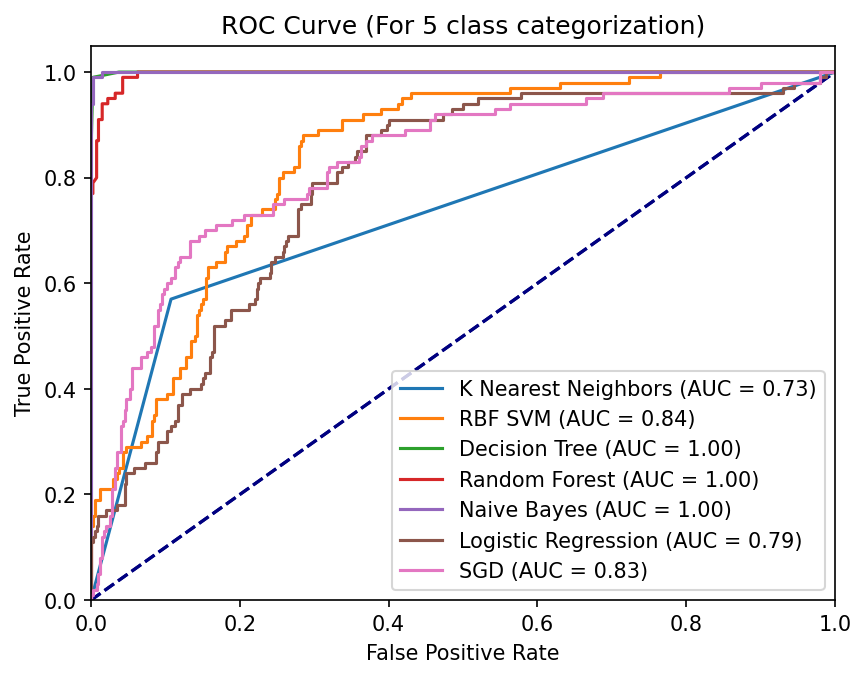

In [35]:
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

clf_score=[]
tst_acc = []
epileptic_no = []
all_y_hat = []
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

conf_matrices = []
y_pred_list = []

# Convert y_test to one-hot encoding
n_classes = len(np.unique(y))
y_test_onehot = label_binarize(y_test, classes=np.arange(n_classes))

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for name, clf in zip(names, classifiers):
        cv = KFold(n_splits=10, random_state=1, shuffle=True)
        scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
        clf.fit(X_train, y_train)
        # score = clf.score(X_test, y_test)
        clf_score.append([mean(scores),name])
        y_hat = clf.predict(X_test)
        all_y_hat.append(y_hat)
        y_pred_list.append(y_hat.copy())
        print(f'Y_hat len: {len(y_hat), len(y_test)}')
        tst_acc.append([accuracy_score(y_test, y_hat), name])
        c_m = confusion_matrix(y_test, y_hat, labels=np.unique(y))
        conf_matrices.append(c_m)
        y_hat = clf.predict_proba(X_test)
        

        # Compute false positive rate, true positive rate and threshold values for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for j in range(n_classes):
            fpr[j], tpr[j], _ = roc_curve(y_test_onehot[:, j], y_hat[:, j])
            roc_auc[j] = auc(fpr[j], tpr[j])

        # Compute micro-average ROC curve and AUC
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test_onehot.ravel(), y_hat.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        # Plot ROC curve for current model
        plt.plot(fpr["micro"], tpr["micro"],  label='%s (AUC = %0.2f)' % (name, roc_auc["micro"])) #color=colors[i],

yo1 = np.load('yo1_five.npy', allow_pickle = True)
yp1 = np.load('yp1_five.npy', allow_pickle = True)
     
# Plot settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (For 5 class categorization)')
plt.legend(loc="lower right")
plt.show()

In [36]:
print(f'Classification Score: {clf_score}')

Classification Score: [[0.5875000000000001, 'K Nearest Neighbors'], [0.52, 'RBF SVM'], [0.9674999999999999, 'Decision Tree'], [0.96, 'Random Forest'], [0.9850000000000001, 'Naive Bayes'], [0.4875, 'Logistic Regression'], [0.36500000000000005, 'SGD']]


In [37]:
print(f'Test Accuracy: {tst_acc}')

Test Accuracy: [[0.57, 'K Nearest Neighbors'], [0.39, 'RBF SVM'], [0.99, 'Decision Tree'], [0.94, 'Random Forest'], [0.99, 'Naive Bayes'], [0.39, 'Logistic Regression'], [0.6, 'SGD']]


In [38]:
# The accuracy is taken from Product_Final.ipynb file results 
tst_acc.append([0.8263, 'LSTM'])

In [39]:
li = ['KNN', 'SVM', 'DT', 'RF', 'NB', 'LR', 'SGD', 'LSTM']

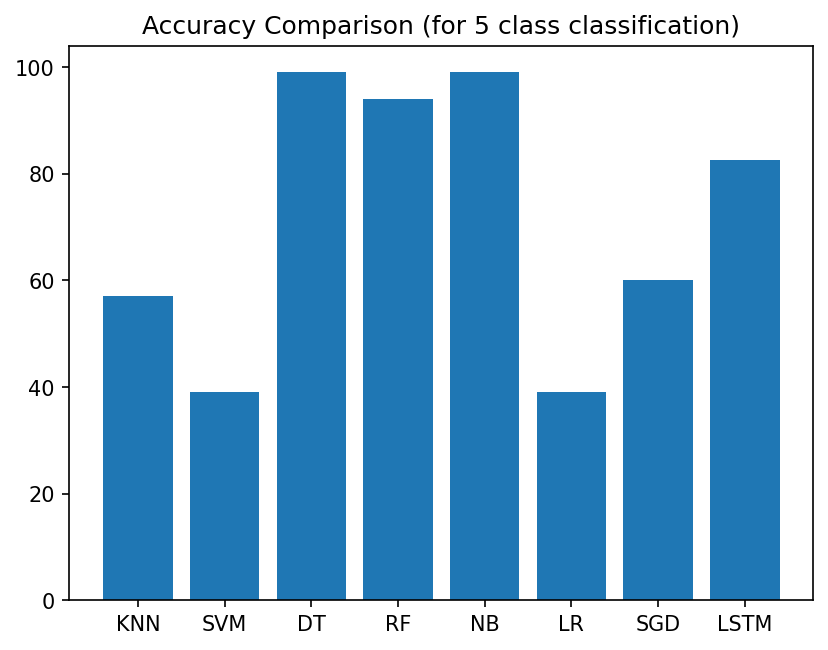

In [40]:
x = np.array([i for i in li])
y = np.array([i[0]*100 for i in tst_acc])

plt.bar(x,y)

plt.title('Accuracy Comparison (for 5 class classification)')
plt.show()


In [41]:
from sklearn.metrics import ConfusionMatrixDisplay

In [42]:
count = 0 
labels = ['Eyes Open','Eyes Closed', 'Hippocampus', 'Epileptogenic', 'Seizure']
fig, axs = plt.subplots(2, 2, figsize=(40,20), sharey='row', sharex='col'

                        # , constrained_layout = True
                        )
font = {'family' : 'normal',
    'weight' : 'bold',
    'size'   : 22}
plt.rc('font', **font)
for i in range(2):
    for j in range(2):
        disp = ConfusionMatrixDisplay(conf_matrices[count], display_labels=labels)
        disp.plot(ax=axs[i,j], xticks_rotation=45)
        disp.ax_.set_title(li[count])
        disp.ax_.set_xlabel('Predicted Label')
        disp.ax_.set_ylabel('True Label')
        disp.im_.colorbar.remove()
        
        # if i!=0:
        #     disp.ax_.set_ylabel('')
        count += 1
# fig.text(0.4, -0.1, 'Predicted label', ha='left')
# fig.supylabel('True Label')
plt.subplots_adjust(wspace=0.40, hspace=0.3)
fig.colorbar(disp.im_, ax=axs)
fig.set_dpi(400)
# fig.tight_layout()
plt.show()

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

In [43]:
len(conf_matrices)

7

In [48]:
c_m = confusion_matrix(y_test, y_hat, labels=np.unique(y))  

In [49]:
# fig, axs = plt.subplots(2, 2, figsize=(40,20), sharey='row', sharex='col'

#                         # , constrained_layout = True
#                         )
# # count = 0
# font = {'family' : 'normal',
#     'weight' : 'bold',
#     'size'   : 22}
# plt.rc('font', **font)
# for i in range(2):
#     for j in range(2):
#         disp = ConfusionMatrixDisplay(conf_matrices[count], display_labels=labels)
#         disp.plot(ax=axs[i,j], xticks_rotation=45)
#         disp.ax_.set_title(li[count])
#         disp.ax_.set_xlabel('Predicted Label')
#         disp.ax_.set_ylabel('True Label')
#         disp.im_.colorbar.remove()
        
#         # if i!=0:
#         #     disp.ax_.set_ylabel('')
#         count += 1
# # fig.text(0.4, -0.1, 'Predicted label', ha='left')
# # fig.supylabel('True Label')
# plt.subplots_adjust(wspace=0.40, hspace=0.3)
# fig.colorbar(disp.im_, ax=axs)
# fig.set_dpi(400)
# # fig.tight_layout()
# plt.show()

In [50]:
len(y_test)/500, len(y_train)/500, y_hat

(0.2,
 0.8,
 array([[6.93536005e-03, 2.37586075e-03, 1.38711982e-01, 8.51492539e-01,
         4.84258741e-04],
        [4.42445266e-01, 1.26628743e-01, 3.86012646e-02, 3.86770999e-01,
         5.55372720e-03],
        [3.37726214e-02, 2.87496644e-01, 4.25288876e-03, 3.95000685e-01,
         2.79477161e-01],
        [5.28420913e-04, 1.35604725e-01, 7.46765916e-05, 5.74744717e-02,
         8.06317705e-01],
        [1.18438822e-02, 2.89820574e-02, 1.89811986e-02, 9.22687681e-01,
         1.75051810e-02],
        [5.13125698e-01, 1.45309925e-02, 1.46063853e-01, 3.26212817e-01,
         6.66388162e-05],
        [1.78247782e-01, 4.98386032e-02, 5.93338545e-02, 7.09749816e-01,
         2.82994411e-03],
        [2.63320338e-03, 8.25611985e-02, 2.14863480e-03, 5.60045811e-01,
         3.52611153e-01],
        [1.21893368e-01, 2.44930673e-02, 7.92301209e-02, 7.73081440e-01,
         1.30200357e-03],
        [4.34859027e-02, 3.21895380e-01, 4.14052340e-03, 3.47717358e-01,
         2.82760836e-01]

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

[[18  1  6  3  0]
 [ 0  7  1  4  2]
 [ 2  3  5  0  0]
 [ 3  6  5 10  0]
 [ 1  2  2  2 17]]
[[ 6  2 20  0  0]
 [ 0  9  0  2  3]
 [ 0  1  8  1  0]
 [ 0  9 13  2  0]
 [ 0  6  4  0 14]]
[[28  0  0  0  0]
 [ 0 14  0  0  0]
 [ 0  0 10  0  0]
 [ 0  1  0 23  0]
 [ 0  0  0  0 24]]


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

[[28  0  0  0  0]
 [ 0 12  0  1  1]
 [ 0  0 10  0  0]
 [ 0  4  0 20  0]
 [ 0  0  0  0 24]]
[[28  0  0  0  0]
 [ 0 14  0  0  0]
 [ 0  0 10  0  0]
 [ 0  1  0 23  0]
 [ 0  0  0  0 24]]
[[ 5  2 21  0  0]
 [ 0  9  1  1  3]
 [ 0  2  8  0  0]
 [ 0  9 14  0  1]
 [ 0  3  4  0 17]]


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

[[17  0  0 11  0]
 [ 1  6  0  4  3]
 [ 4  0  0  6  0]
 [ 2  2  0 19  1]
 [ 1  0  0  5 18]]


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

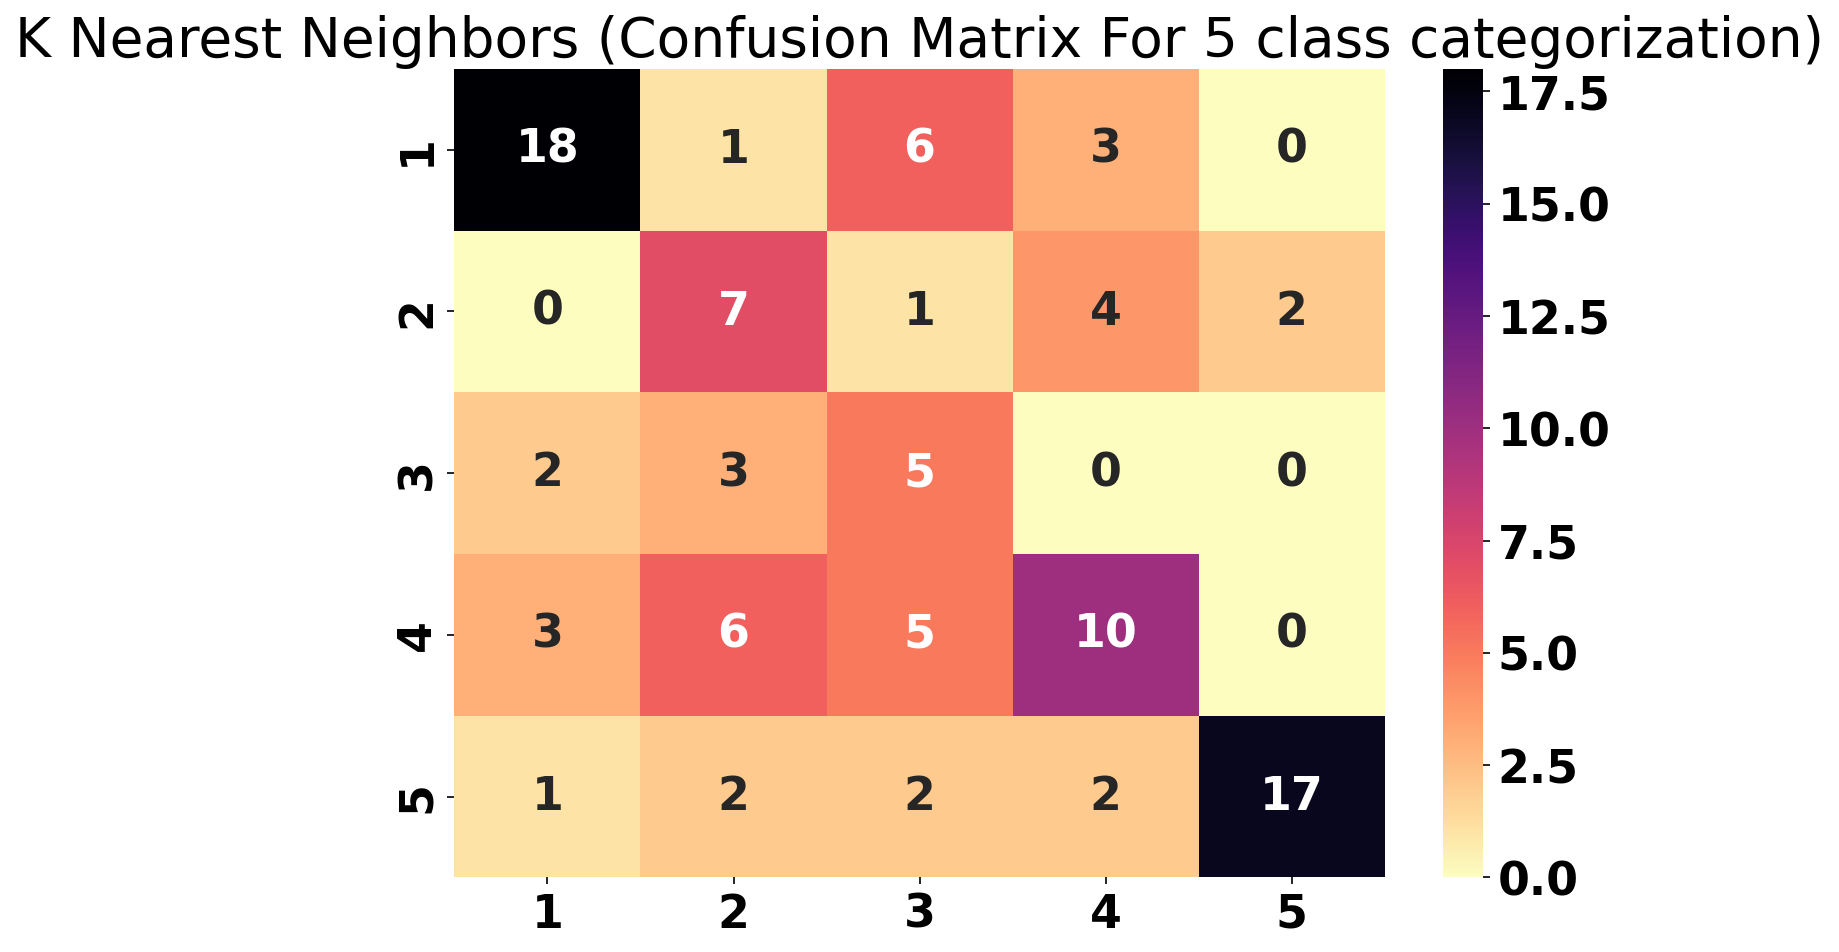

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

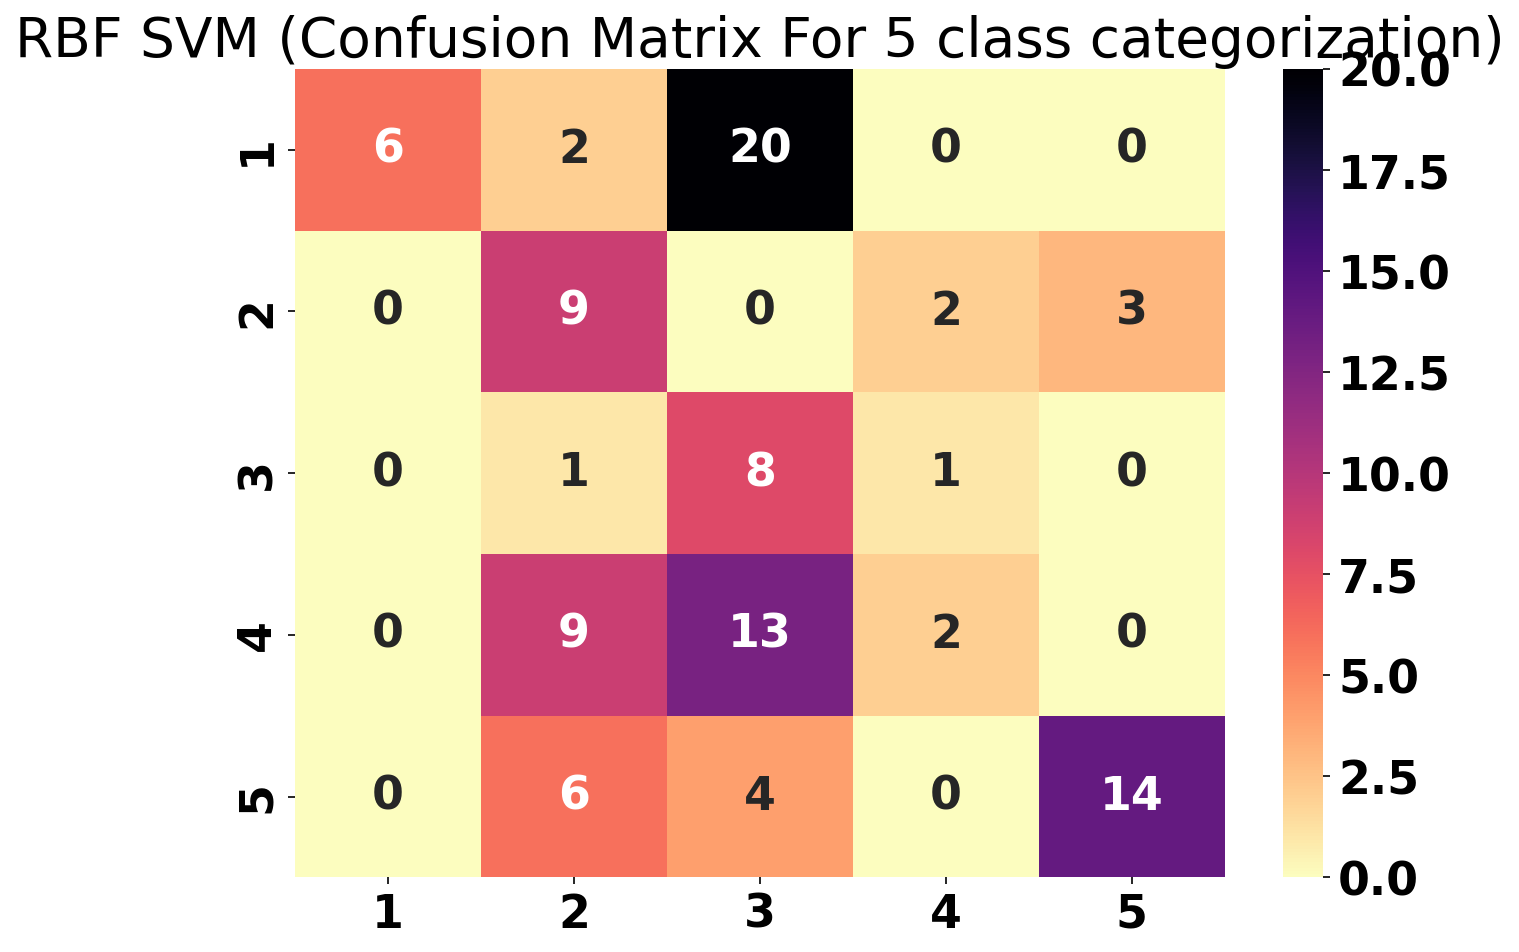

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

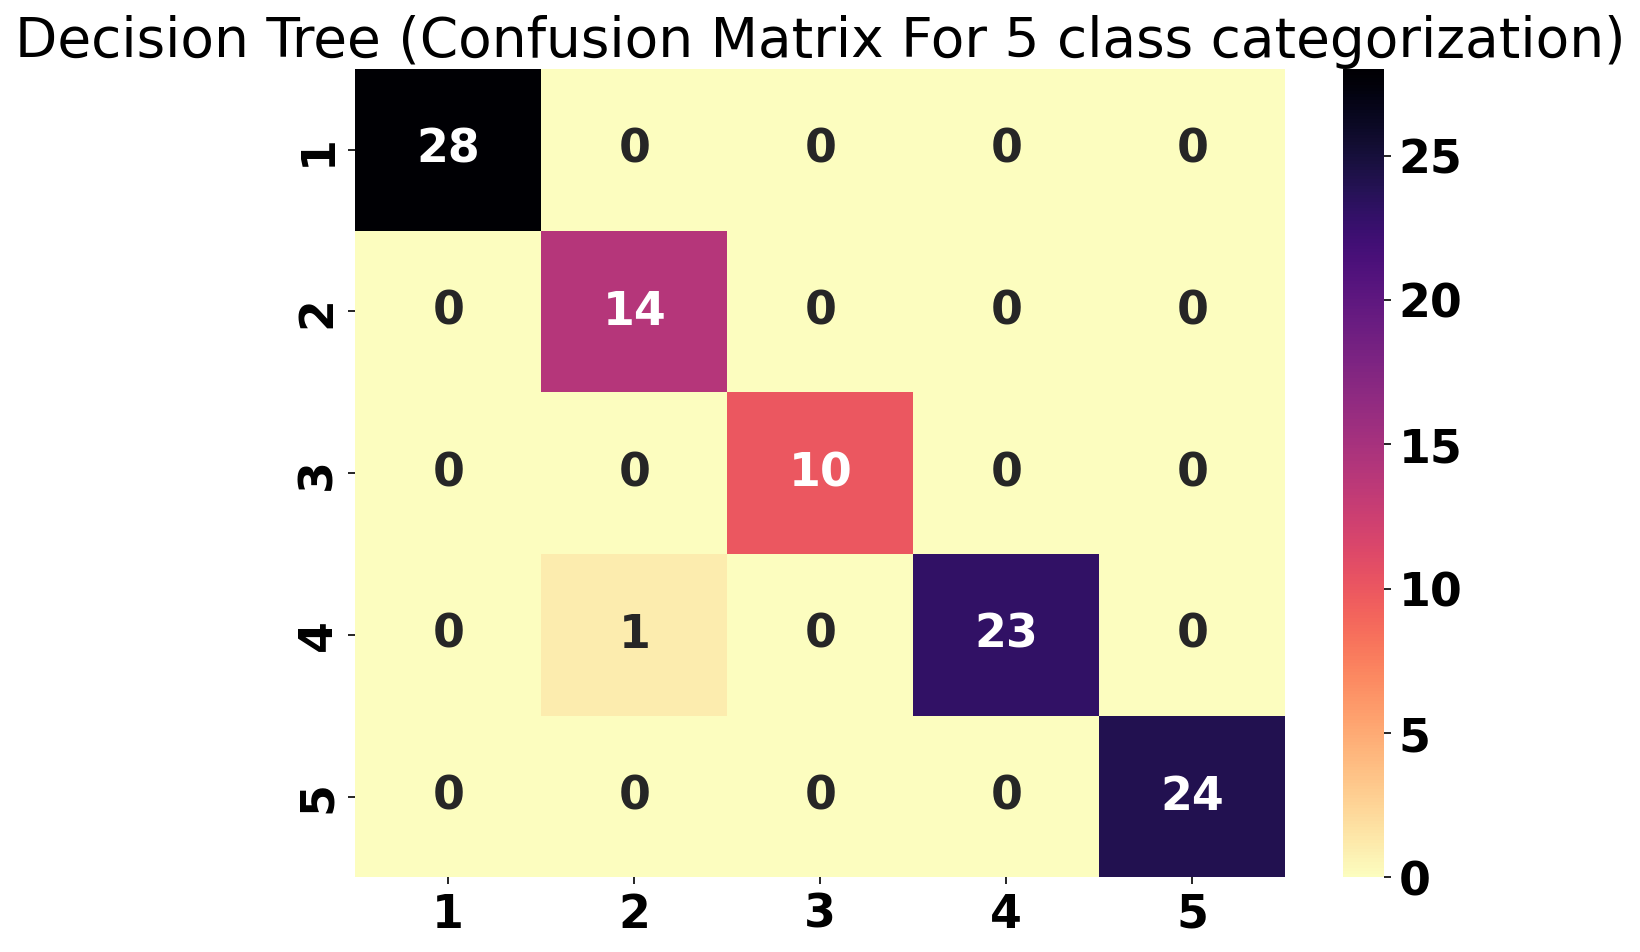

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

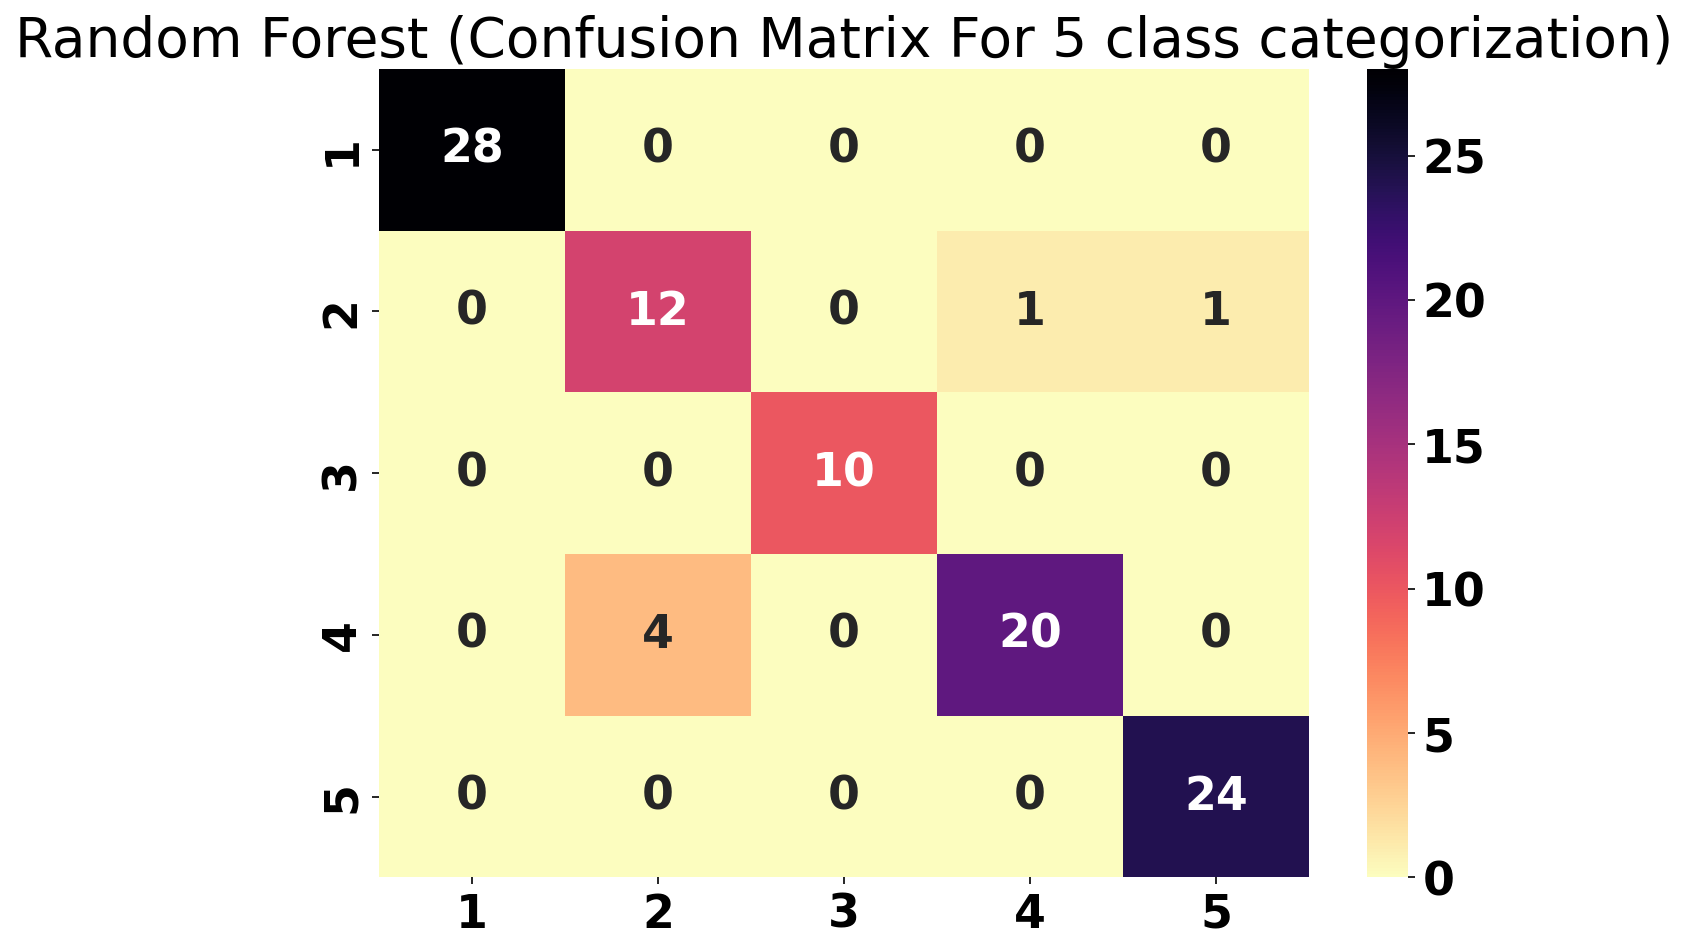

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

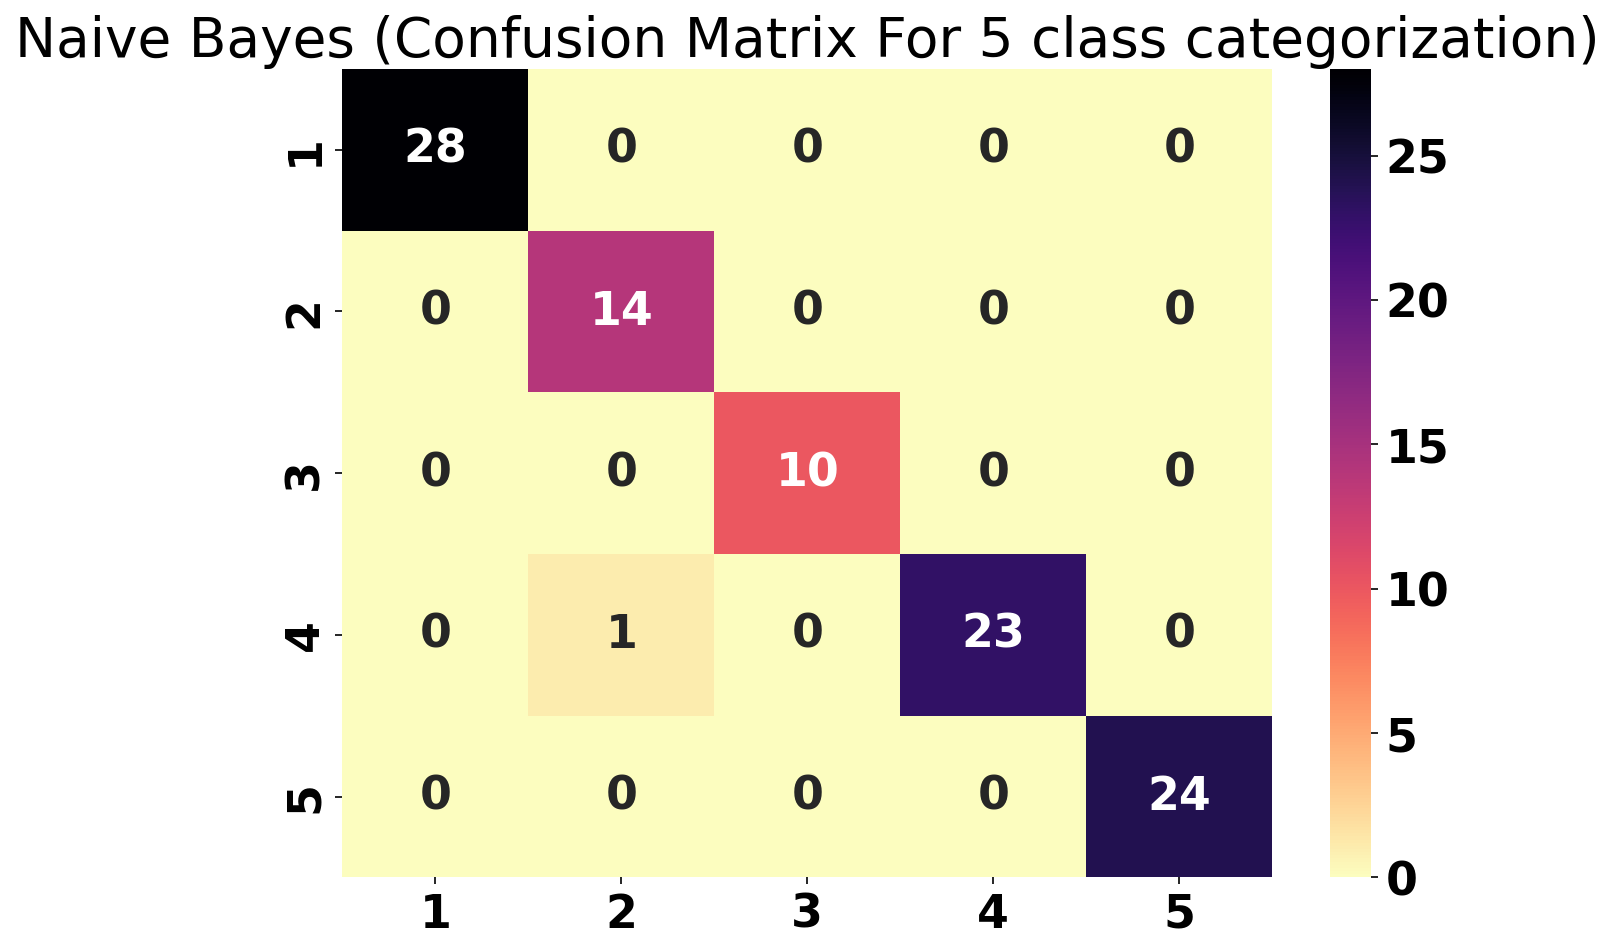

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

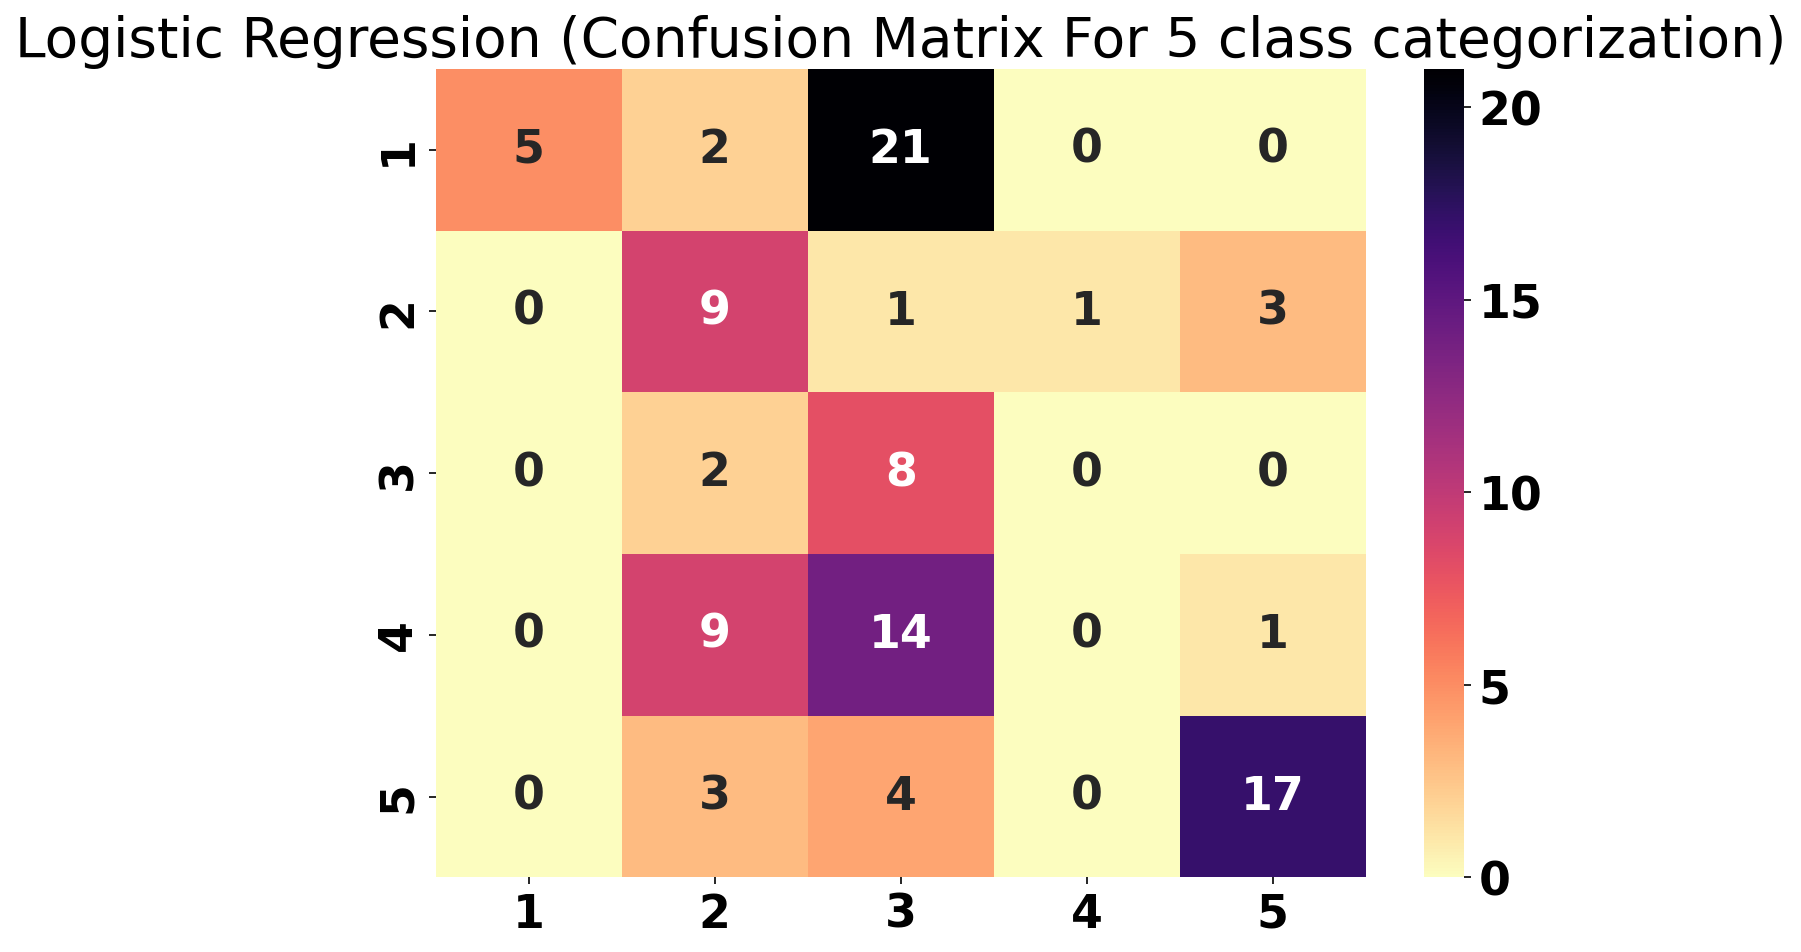

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

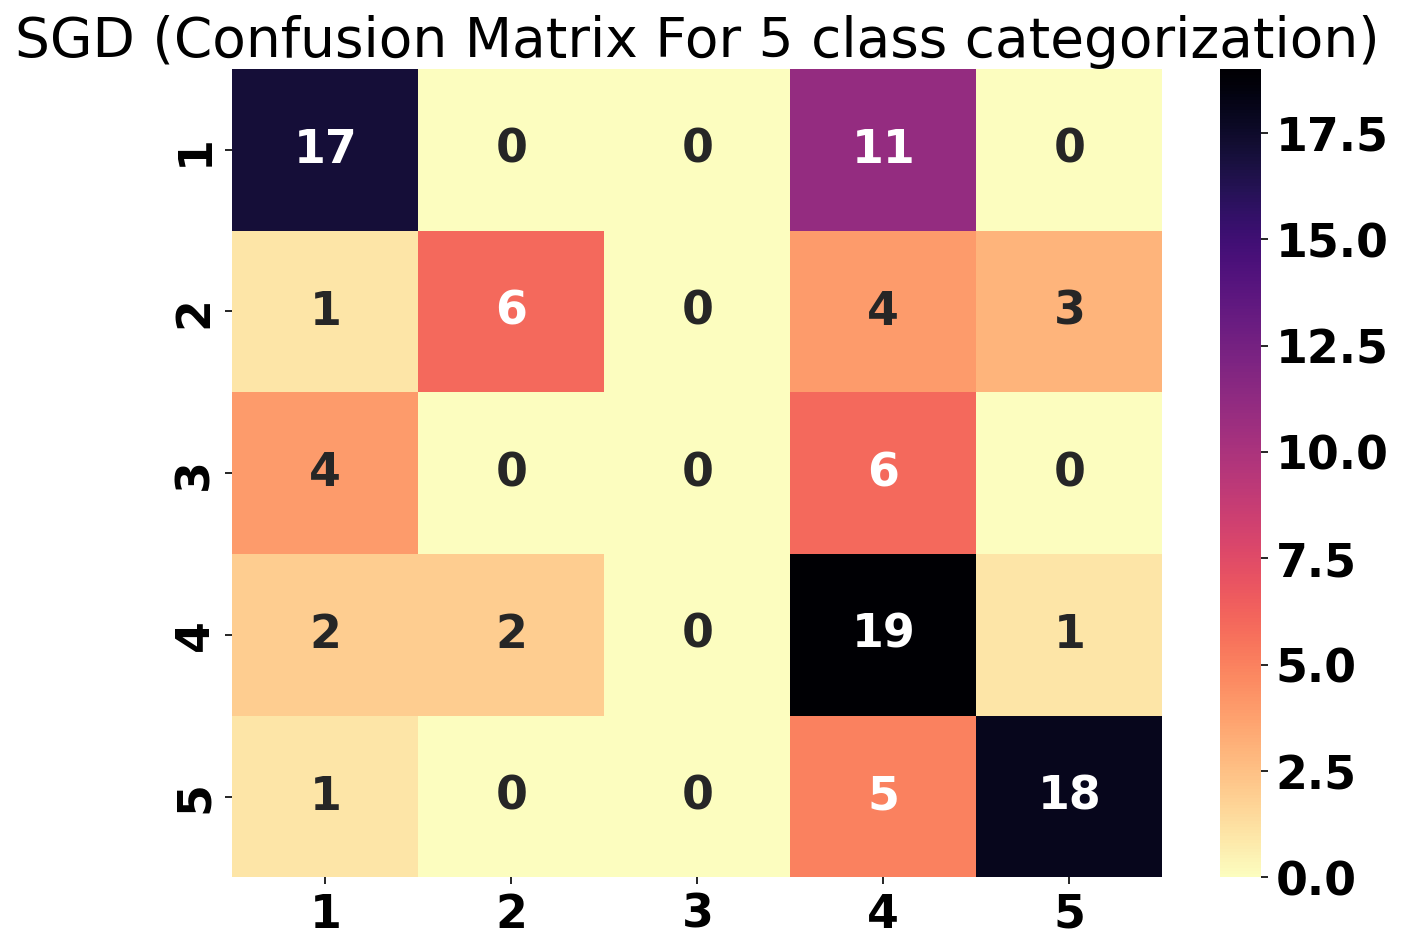

In [46]:
for name, conf_mat in zip(names, conf_matrices):
    df_cm = pd.DataFrame(conf_mat, index = [i for i in "12345"],
                  columns = [i for i in "12345"])
    print(conf_mat)
    plt.figure(figsize = (10,7))
    plt.title(f'{name} (Confusion Matrix For 5 class categorization)')
    # colormap = plt.cm.cubehelix_r
    sn.heatmap(df_cm, annot=True, cmap= 'magma_r')
    
    # plt.show()
    
plt.show()

In [47]:
from sklearn.metrics import precision_recall_fscore_support
for i in range(len(names)):
    print(f'{names[i]}\t:{precision_recall_fscore_support(y_test, np.rint(y_pred_list[i]),average="micro")}')
print(f'LSTM\t:{precision_recall_fscore_support(yo1, np.rint(yp1))}')

K Nearest Neighbors	:(0.57, 0.57, 0.57, None)
RBF SVM	:(0.39, 0.39, 0.39, None)
Decision Tree	:(0.99, 0.99, 0.99, None)
Random Forest	:(0.94, 0.94, 0.94, None)
Naive Bayes	:(0.99, 0.99, 0.99, None)
Logistic Regression	:(0.39, 0.39, 0.39, None)
SGD	:(0.6, 0.6, 0.6, None)
LSTM	:(array([0.99891363, 0.81909548, 0.67508711, 0.85114301, 0.82224707]), array([0.99620802, 0.62589139, 0.84792123, 0.85250266, 0.8060274 ]), array([0.99755899, 0.70957711, 0.75169738, 0.85182229, 0.81405645]), array([1846, 1823, 1828, 1878, 1825]))
